## Scale Features and Build Model
### Scales Raw Features

Import CSV of Aggregated Darshan Logs <br>
Apply Log10 and Percent Scaling

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./raws.csv",lineterminator='\n',sep = ',' ,error_bad_lines=False)
#df.mean()

In [3]:
df = df.drop(df.columns[0],axis = 1)
df = df.drop(df.columns[0],axis = 1)
f = pd.DataFrame()

In [4]:
df

,posix_read_time,posix_write_time,posix_meta_time,posix_bytes_read,posix_bytes_read_100,posix_bytes_read_1K,posix_bytes_read_10K,posix_bytes_read_100K,posix_bytes_read_1lM,posix_bytes_read_4M,...,posix_m_align,lustre_number_of_files,lustre_mdts,lustre_osts,lustre_stripe_size,lustre_stripe_offset,lustre_stripe_width,lustre_number_of_osts,jobid,path
0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,36.000000,1048576.0,0.0,4.0,4.0,9042391.0,../results/USER375904U_sss2_id9042391_9-26-414...
1,104.611641,10.024055,20.060841,2.390891e+10,147688.0,141853.0,33215.0,261267.0,51049.0,0.0,...,13704.0,176.0,1.0,360.000000,1048576.0,0.0,176.0,147.0,9868242.0,../results/USER382862U_SpEC_id9868242_4-29-741...
2,124.560730,42.051125,54.839272,5.019637e+10,332059.0,684893.0,130143.0,919688.0,2515.0,0.0,...,6704.0,224.0,1.0,360.000000,1048576.0,0.0,224.0,186.0,9029683.0,../results/USER264205U_SpEC_id9029683_9-20-580...
3,25763.292969,582.297363,24.895737,5.488943e+12,30785.0,767.0,508381.0,2040.0,13683.0,626216.0,...,2320.0,290.0,1.0,54.993103,1048576.0,0.0,290.0,52.0,9165166.0,../results/USER341996U_CCTM_v52_Linux2_x86_64i...
4,154.534821,681.548279,658.484985,2.293203e+10,588029.0,2926599.0,425127.0,336133.0,98.0,0.0,...,6328.0,201.0,1.0,360.000000,1048576.0,0.0,201.0,158.0,8269019.0,../results/USER141481U_SpEC_id8269019_3-3-4542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875282,138.354477,82.278084,194.485565,5.593977e+10,216146.0,535152.0,99814.0,889010.0,12485.0,0.0,...,9920.0,124.0,1.0,360.000000,1048576.0,0.0,124.0,110.0,7759072.0,../results/USER336298U_SpEC_id7759072_10-30-62...
875283,54.443073,231.440857,25.271391,1.465277e+09,3099.0,0.0,180662.0,0.0,0.0,0.0,...,8704.0,1088.0,1.0,360.000000,1048576.0,0.0,1088.0,359.0,7275819.0,../results/USER331454U_pw.x_id7275819_8-2-4790...
875284,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,36.000000,1048576.0,0.0,5.0,5.0,8305062.0,../results/USER371284U_sss2_id8305062_3-14-211...
875285,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,1.0,36.000000,1048576.0,0.0,2.0,1.0,31428.0,../results/USER303986U_testnodes_opt.x_id31428...


In [5]:

df = df.dropna(axis=0, how='any')
df.columns

Index(['posix_read_time', 'posix_write_time', 'posix_meta_time',
       'posix_bytes_read', 'posix_bytes_read_100', 'posix_bytes_read_1K',
       'posix_bytes_read_10K', 'posix_bytes_read_100K', 'posix_bytes_read_1lM',
       'posix_bytes_read_4M', 'posix_bytes_read_10M', 'posix_bytes_read_100M',
       'posix_bytes_read_1G', 'posix_bytes_read_PLUS', 'posix_bytes_write',
       'posix_bytes_write_100', 'posix_bytes_write_1K',
       'posix_bytes_write_10K', 'posix_bytes_write_100K',
       'posix_bytes_write_1M', 'posix_bytes_write_4M', 'posix_bytes_write_10M',
       'posix_bytes_write_100M', 'posix_bytes_write_1G',
       'posix_bytes_write_PLUS', 'posix_opens', 'posix_reads', 'posix_writes',
       'posix_seeks', 'posix_stats', 'posix_mmaps', 'posix_fsyncs',
       'posix_fdsyncs', 'posix_rename_sources', 'posix_rename_targets',
       'posix_renamed_from', 'posix_renamed_mode', 'posix_number_of_files',
       'nprocs', 'posix_f_align', 'posix_m_align', 'lustre_number_of_files',
   

In [6]:
#files
f['log10_p_files'] = df['posix_number_of_files'] 
f['log10_l_files'] = df['lustre_number_of_files']

In [7]:
#accesses
df['p_accesses'] = df['posix_reads'] + df['posix_writes']
f['log10_p_accesses'] = df['p_accesses']

f['log10_p_accesses']

0               0.0
1          880136.0
2         2379598.0
3         8903411.0
4         7846387.0
            ...    
875282    2234152.0
875283     197651.0
875284          0.0
875285          0.0
875286    6065006.0
Name: log10_p_accesses, Length: 875287, dtype: float64

In [8]:
#bytes
f['p_bytes'] = df['posix_bytes_read'] 

In [9]:
f['p_opens'] = df['posix_opens']
f['p_seeks'] = df['posix_seeks']
f['p_stats'] = df['posix_stats']
f['p_mode'] = df['posix_renamed_mode']

In [10]:
f['l_n_osts'] = df['lustre_number_of_osts']
f['l_stripe_w'] = df['lustre_stripe_width']
f['l_mdts'] = df['lustre_mdts']

In [11]:
f['log10_p_nprocs'] = df['nprocs']
f['log10_p_falign'] = df['posix_f_align']
f['log10_p_malign'] = df['posix_m_align']

In [12]:
f['perc_p_reads'] = df['posix_reads'] 
f['perc_p_writes'] = df['posix_writes'] 

In [13]:
f['perc_p_bytes_read_100'] = df['posix_bytes_read_100']
f['perc_p_bytes_read_1K'] = df['posix_bytes_read_1K']
f['perc_p_bytes_read_10K'] = df['posix_bytes_read_10K'] 
f['perc_p_bytes_read_100K'] = df['posix_bytes_read_100K']
f['perc_p_bytes_read_1M'] = df['posix_bytes_read_1lM']
f['perc_p_bytes_read_4M'] = df['posix_bytes_read_4M']
f['perc_p_bytes_read_10M'] = df['posix_bytes_read_10M']

f['perc_p_bytes_read_100M'] = df['posix_bytes_read_100M']
f['perc_p_bytes_read_1G'] = df['posix_bytes_read_1G']
f['perc_p_bytes_read_PLUS'] = df['posix_bytes_read_PLUS']

In [14]:
f['perc_p_bytes_write_100'] = df['posix_bytes_write_100']
f['perc_p_bytes_write_1K'] = df['posix_bytes_write_1K']
f['perc_p_bytes_write_10K'] = df['posix_bytes_write_10K']
f['perc_p_bytes_write_100K'] = df['posix_bytes_write_100K']
f['perc_p_bytes_write_1M'] = df['posix_bytes_write_1M']
f['perc_p_bytes_write_4M'] = df['posix_bytes_write_4M']
f['perc_p_bytes_write_10M'] = df['posix_bytes_write_10M']
f['perc_p_bytes_write_100M'] = df['posix_bytes_write_100M']
f['perc_p_bytes_write_1G'] = df['posix_bytes_write_1G']
f['perc_p_bytes_write_PLUS'] = df['posix_bytes_write_PLUS']


f = f.replace(-np.inf, -1)
f = f.replace(np.nan, 0)

In [15]:
df['time'] = df['posix_write_time'].astype('float') + df['posix_read_time'].astype('float') + df['posix_meta_time'].astype('float')

In [16]:
df['bytes'] = df['posix_bytes_read'].astype('float') + df['posix_bytes_write'].astype('float')

In [17]:
#df = df[df['bytes'] >9999999]

In [18]:

f['throughput'] = df['bytes'].astype('float') / df['time']

f = f[f['throughput'] >0]

In [19]:
#delete columns with all zeros
f = f.loc[:, (f != 0).any(axis=0)]

#remove infinite values
f = f.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

f.max()

log10_p_files              1.219270e+05
log10_l_files              1.219270e+05
log10_p_accesses           2.251942e+10
p_bytes                    3.038456e+14
p_opens                    5.531094e+08
p_seeks                    1.445220e+10
p_stats                    6.522921e+07
p_mode                     5.337293e+07
l_n_osts                   3.600000e+02
l_stripe_w                 7.438575e+06
l_mdts                     1.000000e+00
log10_p_nprocs             3.520000e+05
log10_p_falign             1.422540e+11
log10_p_malign             1.085312e+06
perc_p_reads               2.237846e+10
perc_p_writes              1.302770e+10
perc_p_bytes_read_100      5.221517e+08
perc_p_bytes_read_1K       2.074657e+10
perc_p_bytes_read_10K      1.536278e+09
perc_p_bytes_read_100K     1.515506e+08
perc_p_bytes_read_1M       4.044503e+08
perc_p_bytes_read_4M       6.561462e+07
perc_p_bytes_read_10M      2.083200e+06
perc_p_bytes_read_100M     2.872090e+05
perc_p_bytes_read_1G       1.792000e+06


In [20]:
t = pd.DataFrame()
t['throughput'] = f['throughput']
f = f.drop(labels = 'throughput', axis = 1)
f

,log10_p_files,log10_l_files,log10_p_accesses,p_bytes,p_opens,p_seeks,p_stats,p_mode,l_n_osts,l_stripe_w,...,perc_p_bytes_read_1G,perc_p_bytes_write_100,perc_p_bytes_write_1K,perc_p_bytes_write_10K,perc_p_bytes_write_100K,perc_p_bytes_write_1M,perc_p_bytes_write_4M,perc_p_bytes_write_10M,perc_p_bytes_write_100M,perc_p_bytes_write_1G
1,799.0,176.0,880136.0,2.390891e+10,8858.0,319241.0,34901.0,37230.0,147.0,176.0,...,0.0,202780.0,16078.0,21989.0,3156.0,1061.0,0.0,0.0,0.0,0.0
2,360.0,224.0,2379598.0,5.019637e+10,62398.0,1107764.0,270222.0,27594.0,186.0,224.0,...,0.0,18852.0,264906.0,22246.0,4282.0,14.0,0.0,0.0,0.0,0.0
3,290.0,290.0,8903411.0,5.488943e+12,8711.0,2010273.0,28432.0,115194.0,52.0,290.0,...,0.0,7302089.0,52045.0,73.0,9.0,25830.0,756.0,0.0,0.0,0.0
4,319.0,201.0,7846387.0,2.293203e+10,23158.0,6015926.0,400399.0,31536.0,158.0,201.0,...,0.0,489873.0,2821931.0,240372.0,17983.0,242.0,0.0,0.0,0.0,0.0
6,428.0,190.0,6647935.0,5.209185e+10,69261.0,4608438.0,410846.0,38982.0,158.0,190.0,...,0.0,255023.0,1927630.0,186048.0,11509.0,158.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875280,1.0,1.0,57344.0,3.006477e+10,1808.0,59128.0,12.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,28672.0,0.0,0.0,0.0,0.0
875281,13.0,4.0,102439.0,7.467916e+08,193.0,91.0,385.0,4818.0,4.0,4.0,...,0.0,33.0,23.0,10927.0,0.0,0.0,0.0,0.0,0.0,0.0
875282,624.0,124.0,2234152.0,5.593977e+10,35112.0,1035457.0,159180.0,16644.0,110.0,124.0,...,0.0,51807.0,397643.0,27690.0,3198.0,1207.0,0.0,0.0,0.0,0.0
875283,1088.0,1088.0,197651.0,1.465277e+09,2112.0,12509.0,4198.0,473916.0,359.0,1088.0,...,0.0,28.0,0.0,38.0,0.0,13824.0,0.0,0.0,0.0,0.0


In [21]:
df = df[df.index.isin(t.index)]
t = t.reset_index()
f = f.reset_index()
f = f.drop(f.columns[0] , axis =1)
t = t.drop(t.columns[0] , axis =1)

In [22]:
f = StandardScaler().fit_transform(f)

In [23]:
t

,throughput
0,1.803194e+08
1,2.282342e+08
2,2.083669e+08
3,1.724841e+07
4,4.581690e+07
...,...
671058,5.482767e+08
671059,2.136637e+07
671060,1.362498e+08
671061,1.942413e+07


In [24]:
print(t.min())
print(t.max())

throughput    0.39201
dtype: float64
throughput    2.344536e+09
dtype: float64


In [25]:
rseed = 3
t_size = 0.4 
train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)

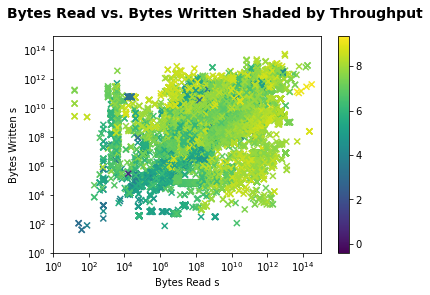

In [26]:
fig = plt.figure()
fig.suptitle('Bytes Read vs. Bytes Written Shaded by Throughput', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sp = ax.scatter(df['posix_bytes_read'],df['posix_bytes_write'], marker = 'x',c = np.log10(t['throughput']),cmap='viridis')

ax.set_xlabel('Bytes Read s')
ax.set_ylabel('Bytes Written s')
ax.loglog()
#plt.autoscale(enable=True, axis='y')
plt.xlim(10**0,10**15)
plt.ylim(10**0,10**15)
fig.colorbar(sp)
plt.show()

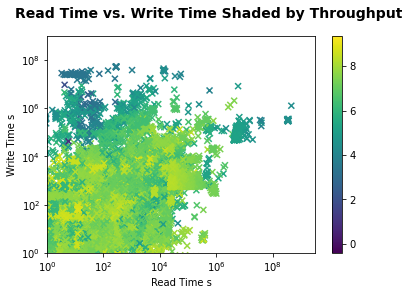

In [27]:
fig = plt.figure()
fig.suptitle('Read Time vs. Write Time Shaded by Throughput', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sp = ax.scatter(df['posix_read_time'],df['posix_write_time'], marker = 'x',c = np.log10(t['throughput']),cmap='viridis')

ax.set_xlabel('Read Time s')
ax.set_ylabel('Write Time s')
ax.loglog()
#plt.autoscale(enable=True, axis='y')
plt.xlim(10**0,10**9.5)
plt.ylim(10**0,10**9)
fig.colorbar(sp)
plt.show()

In [28]:
from sklearn.cluster import KMeans

k = 3
# Create a KMeans instance with k clusters: model
model = KMeans(n_clusters=k,max_iter = 20**10,random_state=rseed)

# Fit model to samples
model.fit(f)

cluster_labels = model.predict(f)


In [29]:
print('c0',(cluster_labels ==0).sum())
print('c1',(cluster_labels ==1).sum())
print('c2',(cluster_labels ==2).sum())
print('c3',(cluster_labels ==3).sum())
print('c4',(cluster_labels ==4).sum())
print('c5',(cluster_labels ==5).sum())
print(t.shape)
#How many items in each cluster

c0 86346
c1 584703
c2 14
c3 0
c4 0
c5 0
(671063, 1)


In [30]:
#cluster splits
t5 = t[pd.Series((cluster_labels == 5).tolist()).astype('bool')]
t4 = t[pd.Series((cluster_labels == 4).tolist()).astype('bool')]
t3 = t[pd.Series((cluster_labels == 3).tolist()).astype('bool')]
t2 = t[pd.Series((cluster_labels == 2).tolist()).astype('bool')]
t1 = t[pd.Series((cluster_labels == 1).tolist()).astype('bool')]
t0 = t[pd.Series((cluster_labels == 0).tolist()).astype('bool')]

f5 = f[pd.Series((cluster_labels == 5).tolist()).astype('bool')]
f4 = f[pd.Series((cluster_labels == 4).tolist()).astype('bool')]
f3 = f[pd.Series((cluster_labels == 3).tolist()).astype('bool')]
f2 = f[pd.Series((cluster_labels == 2).tolist()).astype('bool')]
f1 = f[pd.Series((cluster_labels == 1).tolist()).astype('bool')]
f0 = f[pd.Series((cluster_labels == 0).tolist()).astype('bool')]


In [31]:
reaggregated_predictions = pd.DataFrame()
reaggregated_truths = pd.DataFrame()
print(reaggregated_predictions.shape)
print(reaggregated_truths.shape)

(0, 0)
(0, 0)


In [32]:
import xgboost as xg
train_data, test_data, train_labels, test_labels = train_test_split(f0,t0, test_size=t_size, random_state=rseed)
xgb_r = xg.XGBRegressor(n_estimators = 10000, seed = 123)
print(train_labels)
xgb_r.fit(train_data, train_labels)
predicted_labels = xgb_r.predict(test_data)


print(reaggregated_predictions.shape)
print(reaggregated_truths.shape)

          throughput
133775  1.829561e+08
180721  2.106758e+08
220477  2.004793e+08
238452  1.752166e+08
658072  1.716196e+08
...              ...
374032  1.736253e+08
459598  1.338847e+08
599383  1.910525e+08
523182  1.789105e+08
556137  2.051374e+08

[51807 rows x 1 columns]
(0, 0)
(0, 0)


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
print("Mean True Value: \t",int(test_labels.mean() ))
print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )

#print("Mean Squared Logarithmic Error : ", mean_squared_log_error( test_labels, predicted_labels ))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))

print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")

print(xgb_r.feature_importances_)

Mean True Value: 	 179346635
Mean Absolute Error: 	 21761358
Mean Squared Error:  1159223056499938.5
Root Mean Squared Error:  34047364.89803489
MAPE :1.4464524342560128
R2: -0.0920872701810298

[1.41547259e-03 7.68862024e-04 1.42577826e-03 1.29771116e-03
 7.82353047e-04 2.30675307e-03 5.21722250e-04 1.22190546e-03
 1.39093329e-03 2.70419866e-01 0.00000000e+00 7.41653144e-04
 4.94352389e-06 0.00000000e+00 1.63524656e-03 2.15776637e-03
 6.33230805e-03 8.29890632e-05 4.81698057e-03 1.32698305e-02
 4.71726805e-03 2.62903306e-03 1.97149417e-03 2.10469661e-05
 6.57926679e-01 1.66798302e-03 1.24532508e-03 2.04999000e-03
 2.83524987e-05 2.87627132e-04 1.65863354e-02 2.97571441e-05
 2.46018346e-04 0.00000000e+00]


In [34]:
train_data, test_data, train_labels, test_labels = train_test_split(f1,t1, test_size=t_size, random_state=rseed)
xgb_r = xg.XGBRegressor(n_estimators = 10000, seed = 123)
xgb_r.fit(train_data, train_labels)
predicted_labels = xgb_r.predict(test_data)

reaggregated_predictions = pd.concat([reaggregated_predictions, pd.DataFrame(predicted_labels)])
reaggregated_truths = pd.concat([reaggregated_truths,pd.DataFrame(test_labels)])

print(reaggregated_predictions.shape)
print(reaggregated_truths.shape)

print(xgb_r.feature_importances_)

(233882, 1)
(233882, 1)
[0.03728865 0.01336772 0.00430669 0.08817782 0.02479987 0.01322633
 0.00321312 0.01039791 0.00228661 0.02924263 0.         0.02074581
 0.00375867 0.         0.01986714 0.01172246 0.01574154 0.1245335
 0.00524096 0.00918465 0.05386049 0.10411897 0.00773256 0.00834696
 0.02054485 0.00438797 0.00437389 0.01010524 0.00715781 0.0058743
 0.11599223 0.03905499 0.01687482 0.1644729 ]


In [35]:
print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
print("Mean Absolute Error: ", mean_absolute_error(test_labels, predicted_labels) )
print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
#print("Mean Squared Logarithmic Error : ", mean_squared_log_error( test_labels, predicted_labels ))
print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")

Mean Squared Error:  1350988260692021.5
Mean Absolute Error:  16940181.5286155
Root Mean Squared Error:  36755792.20601865
MAPE :28.553166251451195
R2: 0.8858839988926747



In [36]:
train_data, test_data, train_labels, test_labels = train_test_split(f2,t2, test_size=t_size, random_state=rseed)
xgb_r = xg.XGBRegressor(n_estimators = 10000, seed = 123)
xgb_r.fit(train_data, train_labels)
predicted_labels = xgb_r.predict(test_data)
reaggregated_predictions = pd.concat([reaggregated_predictions, pd.DataFrame(predicted_labels)])
reaggregated_truths = pd.concat([reaggregated_truths,pd.DataFrame(test_labels)])

print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
print("Mean Absolute Error: ", mean_absolute_error(test_labels, predicted_labels) )
print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
#print("Mean Squared Logarithmic Error : ", mean_squared_log_error( test_labels, predicted_labels ))
print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")

print(reaggregated_predictions.shape)
print(reaggregated_truths.shape)

print(xgb_r.feature_importances_)

Mean Squared Error:  9124664.374664798
Mean Absolute Error:  2253.3926194532996
Root Mean Squared Error:  3020.7059397870557
MAPE :0.08989300203891798
R2: 0.07402132806454831

(233888, 1)
(233888, 1)
[9.9999911e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0166643e-07 0.0000000e+00 0.0000000e+00 8.2525980e-07 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


In [37]:
print("Mean Absolute Error: ", mean_absolute_error(reaggregated_truths, reaggregated_predictions) )

print("Mean Squared Error: ", mean_squared_error(reaggregated_truths, reaggregated_predictions) )
print("MAPE :" + str(mean_absolute_percentage_error( reaggregated_truths, reaggregated_predictions )))
print("R2: " + str(r2_score(reaggregated_truths,reaggregated_predictions)) + "\n")

print(reaggregated_predictions.shape)
print(reaggregated_truths.shape)

Mean Absolute Error:  16939747.014793433
Mean Squared Error:  1350953603379506.8
MAPE :28.552436074445552
R2: 0.8858852229512992

(233888, 1)
(233888, 1)


In [38]:
e = reaggregated_predictions[0].values - reaggregated_truths['throughput'].values
e

array([-4.30313386e+06,  7.00578536e+06, -7.77315726e+05, ...,
        1.40260916e+03,  6.35554015e+03, -6.35824889e+02])

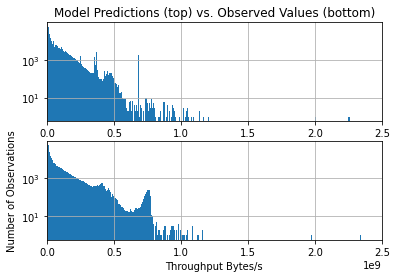

In [92]:
plt.subplot(211)
            
plt.hist(reaggregated_predictions, bins = 300)
plt.grid(visible='on')
plt.xlim([0,2.5*10**9])
plt.yscale('log')
plt.title('Model Predictions (top) vs. Observed Values (bottom)')

plt.subplot(212)

plt.ylabel('Number of Observations')
plt.xlabel('Throughput Bytes/s')

plt.hist(reaggregated_truths, bins = 300)
plt.grid(visible='on')
plt.xlim([0,2.5*10**9])
plt.yscale('log')

Text(0, 0.5, 'Number of Occurrances')

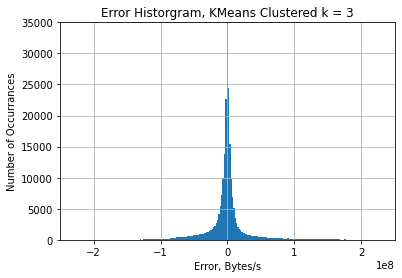

In [95]:
plt.hist(e, bins = 1000)
plt.grid(visible='on')
plt.xlim([-0.25*10**9,0.25*10**9])
plt.ylim(0,35000)
plt.title('Error Historgram, KMeans Clustered k = 3')
plt.xlabel('Error, Bytes/s')
plt.ylabel('Number of Occurrances')